### Polynomial Regression

We want to model the strength of iron welded together with the current used during the welding process. Thus, we only have one feature to model.


Firstly, we examine the data to find a suitable model.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Plotting configuration
%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
df = pd.read_csv('data/polynomial_regression.csv')
df.head()

,y,x
0,80.197118,-2.566618
1,96.100338,-2.126984
2,102.216391,-2.041836
3,115.876434,-0.949271
4,111.296920,-0.771169


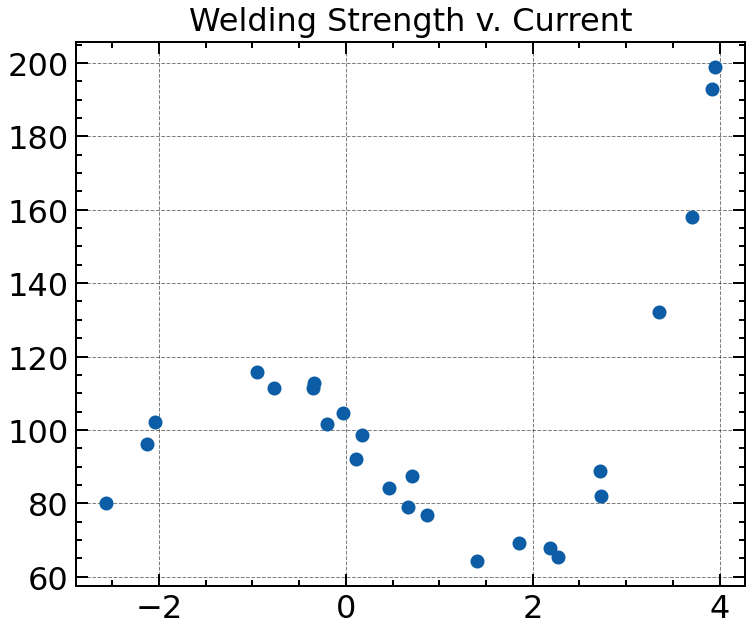

In [3]:
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'])
ax.set_title('Welding Strength v. Current')

fig.set_size_inches(6, 5)
plt.show()

### Model Selection

The data is suggesting a polynomial fit. A hypothesised model would be:

$$
Y_i = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 +\varepsilon_i
$$

To estimate $\hat{\mathbf{\beta}}$ we solve the OLS problem using the normal equations, yielding:
$$
\hat{\mathbf{\beta}} =\mathbf{X}^{\dagger}\mathbf{Y} = (\mathbf{X}^{\text{T}}\mathbf{X})^{-1}\mathbf{X}^{\text{T}}\mathbf{Y}
$$

Using the design matrix $\mathbf{X}$ and output data $\mathbf{Y}$. In addition, we will calculate $R^2$, to esimate how well the model works on the training data. Recall:
$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$

In which:

$$
\text{SST} = \sum_{i=1}^n(y_i - \bar{y})^2
$$
$$
\text{SSE} = \sum_{i=1}^n(y_i - \hat{y}_i)^2
$$

In [4]:
# Creating the design matrix.
n_observations = len(df)
x0 = np.ones(n_observations)
x1 = np.array(df['x'])
x2 = np.array((df['x'] ** 2))
x3 = np.array((df['x'] ** 3))
X = np.stack([x0, x1, x2, x3]).T
Y = np.array(df['y'])

# Solving the normal equations.
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ Y
H_hat = X @ np.linalg.inv(X.T @ X) @ X.T
print('OLS beta coefficients:', beta_ols)

# Calculating R2.
sst = (Y - np.mean(Y)).T @ (Y - np.mean(Y))
sse = (Y - H_hat @ Y).T @ (Y - H_hat @ Y)
r2 = 1 - sse / sst
print('R-square value:', r2)

OLS beta coefficients: [ 99.31736762 -26.31042095  -3.3667638    4.1069712 ]
R-square value: 0.9871777691798865


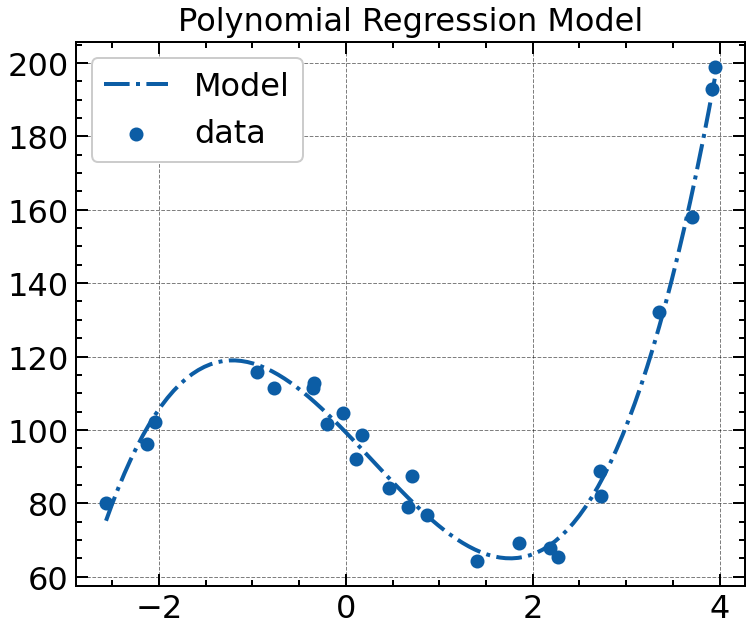

In [5]:
# Plotting the mean - model.
x = np.linspace(np.min(df['x']), np.max(df['x']), 100)
input = np.stack([np.ones(100), x, x**2, x**3]).T
y = beta_ols @ input.T

fig, ax = plt.subplots()

ax.plot(x, y, linestyle='dashdot', label='Model')
ax.scatter(df['x'], df['y'], label='data')
ax.legend()
ax.set_title('Polynomial Regression Model')

fig.set_size_inches(6, 5)
plt.show()

### Tikhonov Regularization (L2 Ridge Regression)

Let us now add more polynomial terms. In doing so we can capture more complicated patterns. However, with the small sample size in comparision to the number of paramters, overfitting will become an issue.

The new model is:
$$
Y_i = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4 + \beta_5 x^5 + \beta_6 x^6 + \beta_7 x^7 + \beta_8 x^8 +\varepsilon_i
$$
We solve the normal equations and examine the output.

In [6]:
# Creating the design matrix.
n_observations = len(df)
x0 = np.ones(n_observations)
x1 = np.array(df['x'])
x2 = np.array((df['x'] ** 2))
x3 = np.array((df['x'] ** 3))
x4 = np.array((df['x'] ** 4))
x5 = np.array((df['x'] ** 5))
x6 = np.array((df['x'] ** 6))
x7 = np.array((df['x'] ** 7))
x8 = np.array((df['x'] ** 8))
X = np.stack([x0, x1, x2, x3, x4, x5, x6, x7, x8]).T
Y = np.array(df['y'])

# Solving the normal equations.
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ Y
H_hat = X @ np.linalg.inv(X.T @ X) @ X.T
print('OLS beta coefficients:', beta_ols)

# Calculating R2.
sst = (Y - np.mean(Y)).T @ (Y - np.mean(Y))
sse = (Y - H_hat @ Y).T @ (Y - H_hat @ Y)
r2 = 1 - sse / sst
print('R-square value:', r2)

OLS beta coefficients: [ 1.00449808e+02 -2.46358182e+01 -6.07399227e+00  2.97031814e+00
  6.78916281e-01  3.62729178e-01 -9.24913129e-02 -3.79253608e-02
  8.65003852e-03]
R-square value: 0.9896652511374529


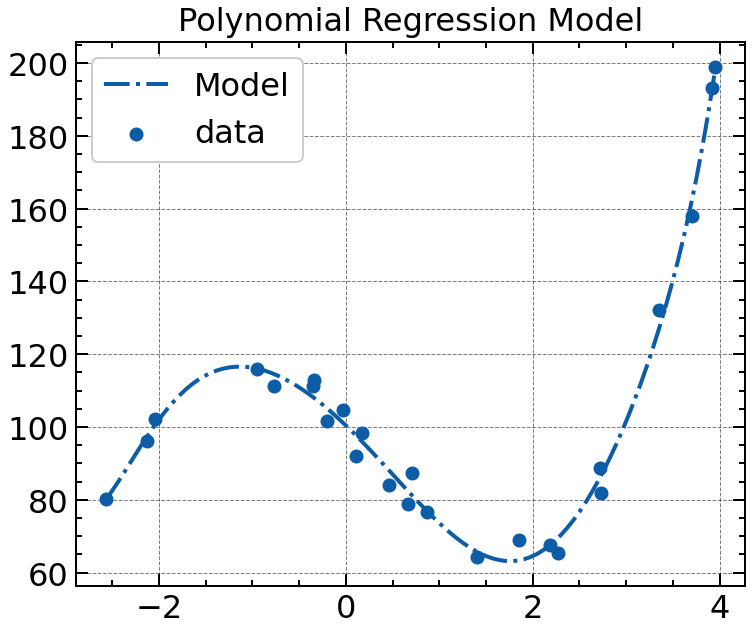

In [7]:
# Plotting the mean - model.
x = np.linspace(np.min(df['x']), np.max(df['x']), 100)
input = np.stack([np.ones(100), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8]).T
y = beta_ols @ input.T

fig, ax = plt.subplots()

ax.plot(x, y, linestyle='dashdot', label='Model')
ax.scatter(df['x'], df['y'], label='data')
ax.legend()
ax.set_title('Polynomial Regression Model')

fig.set_size_inches(6, 5)
plt.show()

### Confidence and Prediction Bands